In [1]:
%matplotlib inline

from importlib import reload

import logging
import os
import pathlib

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import fitsio
import pyds9

In [2]:
d3 = pyds9.DS9('display3', start=True)

In [3]:
import hxstack as hx
import hxdisplay as hxdisp
reload(hx)
reload(hxdisp)

<module 'hxdisplay' from '/data/pfsx/notebooks/hxdisplay.py'>

In [4]:
import time
def impath(cam=None, visit=None):
    p = pathlib.Path('/data/pfsx')
    if cam is None:
        cam = ''
    else:
        camNums = dict(b=1,r=2)
        cam = f'{cam[1]}{camNums[cam[0]]}'
    if visit is None:
        visit = ''
    else:
        visit = '%06d' % int(visit)
        
    images = sorted(p.glob(f'2019-[01][0-9]-[0-9][0-9]/PF*{visit}{cam}.fits'))    
    return images[-1]

def lastFile(cam=None):
    return impath(cam=cam)

def lastFile():
    p = pathlib.Path('/data/pfsx')
    dirs = p.glob('20[12][0-9]-[01][0-9]-*')
    lastDir = sorted(dirs)[-1]
    
    images = sorted(lastDir.glob('PF*'))
    
    return images[-1]


def oneCmd(actor, cmd, quiet=True, timeLim=10):
    import subprocess
    import shlex
    
    t0 = time.time()
    
    logLevel = 'f' if quiet else 'i'
    args = shlex.split(f'oneCmd.py --level={logLevel} {actor} {cmd}')
    print(args)
    ret = subprocess.run(args, stderr=subprocess.PIPE, stdout=subprocess.PIPE,
                        encoding='latin-1')
    if not quiet:
        print(ret.stderr)
    ret.check_returncode()
    
    if not quiet:
        print(ret.stdout)
        
    t1 = time.time()
    if t1-t0 < 1.1:
        time.sleep(1.1-(t1-t0))


In [5]:
def getTemps(fname, tempIds=(1,2,3)):
    hdr = pyfits.getheader(fname, 0)

    temps = []
    for i in tempIds:
        temps.append(hdr[f'W_XTMP{i}'])
    return temps

In [12]:
oneCmd('hx_n8', 'ramp nread=20 lamp=1 lamp=700', quiet=False)

['oneCmd.py', '--level=i', 'hx_n8', 'ramp', 'nread=20', 'lamp=1', 'lamp=700']
2019-11-04 14:19:46.159Z root             30 sdss3logging.py:283 disabling all but critical stderr output

2019-11-04T19:19:46.183 sent hx_n8 ramp nread=20 lamp=1 lamp=700
2019-11-04T19:19:46.195 hx_n8 f text="Unmatched command: ramp nread=20 lamp=1 lamp=700 (exception: Invalid cmd: ramp nread=\"20\" lamp=\"1\" lamp=\"700\")"



## 2019-04-10

Pumped down but warm, with 18660 and ASIC 118
Configured as warmNoIrp (IRP looks strange when warm).

- 2156, detector looks fine. Same gross electronic noise as in n1 and on n9/18315

## 2019-04-15

Cooling, Running 5 min 5-read ramp, with each read preceded by SPI and telemetry reads

- 2300 .. 2325 config = warmNoIrp
- 2326 .. config = cold

## 2019-04-21

Darks until 3530

3551-3554 0 980
3555 dark

## 2019-04-29

3610 dark 20 last bad
   DSub 0.4 -> 0.5
3611 dark 20 last bad

## 2019-05-13

## 2019-05-24
- 3719, pumping, warmNoIrp, good but showing "saturated-by-LEDs" pattern

## 2019-05-29
- 3723, about to cool, warmNoIrp OK
- 3724, cooling, cold, ugly but I think ok
- 3726, cooling, back to warmNoIrp for now. Looks OK.

Starting 15 min 5-read loop

- 3729 ok, 272K/268K, 

Switching to "cold", same loop

- 3733, starting to gain flux, look real.
- 3734, 217/212, looking real

Set voltages to sheet

- 3735, 215/210, voltages did change things.

Starting 10 min 10-read loop

- 3744, 167/170, turn on ASIC heater power=60

- 3747, 154/183, dark current linear, 60e-/s
- 3749, 147/178, 18e-/s
- 3751, 141/173, 6.6e-/s
- 3753, 135/168, 2.5 e-/s
- 3793, 98/140, 0.06 e-/s

Stopped loop

- 3794, 98/140 50 reads
- 3795, 97/139 80 reads (but lowered ASIC heater in middle)

## 2019-05-31

- 3800 94.5/133 80 reads, 0.01 e-/s
- 3801 lamp1=800 10 read, 50e-/s, ~5k signal
- 3802 dark,10rd, not too much residual pattern, 0.06 e-/s
- 3803 lamp1=800. 10 read
- 3804 dark,10 hmm: 0.3e-/s
- 3805 lamp1=800, 40 read
- 3806 dark,20 5.3e-/s, noticeably fading
- 3807 dark,20 after ~30m, 0.35 e-/s
- 3808 dark,20 after ~30m, 0.18 e-/s

## 2019-06-03

- 3810 dark,20 0.01 e-/s

Load Teledyne FW, set voltages
- 3811 dark,20 hideous but ok
- 3812 lamp1=800,10 238 e-/s
- 3813 lamp1-800,40 300 e-/s, linear-ish to 60k
- 3814 dark,20 1.6e-/s
- 3815 dark,20 0.6e-/s
- 3816 dark,20 0.26 e-/s

## 2019-06-05

Power-cycled due to temps admin work
- 3818 dark,5 all 0s. Rebump
- 3819 dark,5 all 0s.
- 3820 grounded inputs. Ugly. S

## 2019-06-06 

Warmed up, cooled back to 140K

- 3826 dark,10 OK

## 2019-06-14

- 3859 dark,20 OK

## 2019-11-04

Wiring in Shuttle PC with Windows IDE

- 3860 dark,20 OK


In [140]:
lastFname = hx.rampPath(3801,cam='n8')
lastRamp = hx.ramp(lastFname)
asicTemp, h4Temp = getTemps(lastFname, [1,10]) 
print(lastFname, len(lastRamp), getTemps(lastFname, [1,10,12]))

/data/pfsx/2019-05-31/PFJB00380183.fits 11 [145.6783, 94.5252, 132.8987]


In [141]:
lastImg = hxdisp.imShow(lastRamp, d3, r0=0, r1=-1)

In [129]:
cds = hx.rampCds(lastRamp)

In [134]:
expTime = (len(lastRamp)*11.14)
cdsPixels = cds.flatten() / expTime

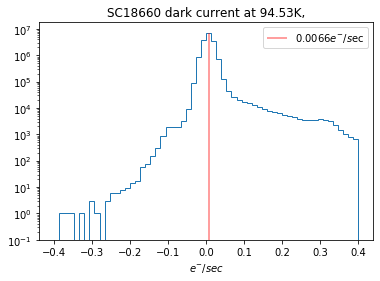

In [138]:
f,p1 = plt.subplots()
_ = p1.hist(cdsPixels, range=(-0.4,0.4), bins=60, log=True, histtype='step') #, density=True, stacked=True)
p1.vlines(np.median(cdsPixels), 0, np.max(_[0]), color='r', alpha=0.5, label=f'${np.median(cdsPixels):0.4f} e^{{-}}/s$ec')
p1.set_xlabel(f'$e^{{-}}/sec$')
p1.set_title(f'SC18660 dark current at {h4Temp:0.2f}K,') #' {expTime:0.0f} sec')
p1.legend()

In [139]:
f.savefig('SC18660_dark.pdf')

hreads=20 readTime=11.14 adcGain=1.6421602753473457
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
x: [ 11.14  22.28  33.42  44.56  55.7   66.84  77.98  89.12 100.26 111.4
 122.54 133.68 144.82 155.96 167.1  178.24 189.38 200.52]
y: [-5041.432 -5043.074 -5039.79  -5041.432 -5041.432 -5041.432 -5039.79
 -5041.432 -5039.79  -5039.79  -5041.432 -5041.432 -5043.074 -5041.432
 -5041.432 -5043.074 -5039.79  -5038.148]


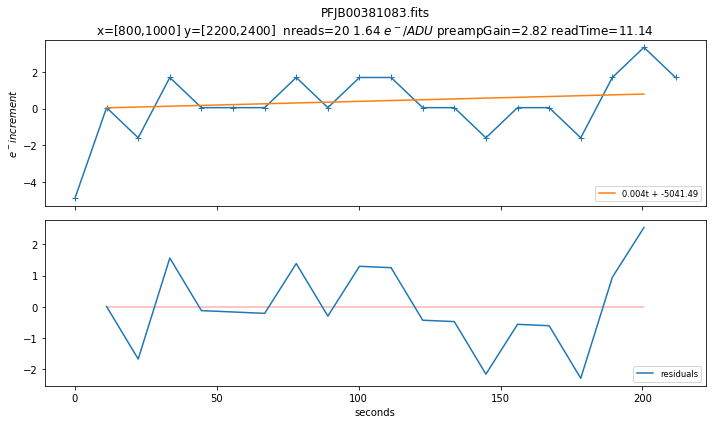

In [35]:
# Up the ramp signal
reload(hxdisp)
slices = slice(2200,2401), slice(800,1001)
fig, *_ = hxdisp.regStats(lastFname, r0=0, fitr0=1, fitr1=-1, preampGain=2.82, slices=slices, order=1)

hreads=40 readTime=5.57 adcGain=1.6421602753473457
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
x: [  5.57  11.14  16.71  22.28  27.85  33.42  38.99  44.56  50.13  55.7
  61.27  66.84  72.41  77.98  83.55  89.12  94.69 100.26 105.83 111.4
 116.97 122.54 128.11 133.68 139.25 144.82 150.39 155.96 161.53 167.1
 172.67 178.24 183.81 189.38 194.95 200.52 206.09 211.66]
y: [-7992.7773  -6799.6084  -5257.6855  -3659.9475  -2026.7614   -351.47202
  1342.5414   3078.352    4853.983    6688.2905   8514.4795  10314.501
 12124.281   13942.756   15761.012   17585.73    19404.373   21231.938
 23060.762   24870.672   26677.254   28485.736   30275.457   32057.625
 33830.867   35594.812   37341.074   39071.094   40759.414   42395.44
 43948.14    45372.062   46662.797   47845.605   48950.44    50004.83
 51000.67    51962.156  ]


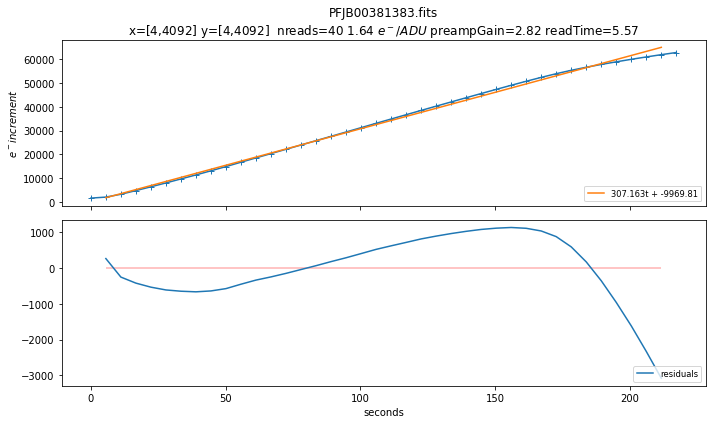

In [24]:
# Up the ramp signal
reload(hx)
reload(hxdisp)
fig, *_ = hxdisp.regStats(lastFname, r0=0, fitr0=1, fitr1=-1, preampGain=2.82)

In [534]:
import astropy.io.fits as pyfits

for f in 3800, 3801, 3802, 3805, 3806, 3808:
    if f == 3805:
        r1 = 13
    else:
        r1=-1
    cds = hx.rampCds(hx.rampPath(f, cam='n8'), r0=2, r1=r1)
    pyfits.writeto(f'/data/cpl/{f}.fits', cds)

11: 785.88 648.89 1.211
12: 1593.45 2274.50 0.701
13: 2407.24 4821.13 0.499
14: 3294.78 8902.59 0.370
15: 4132.68 12746.48 0.324
16: 4899.86 17377.81 0.282
17: 5853.22 25440.03 0.230
18: 6794.38 34989.88 0.194
19: 7636.48 41483.31 0.184
20: 8521.47 51254.12 0.166
21: 9374.70 61917.99 0.151
22: 10365.39 74072.78 0.140
23: 11360.33 96603.22 0.118
24: 12172.46 95686.15 0.127
25: 13195.53 110996.22 0.119
26: 14036.13 124031.35 0.113
27: 14820.05 133674.72 0.111
28: 15774.57 151040.44 0.104
29: 16374.34 153933.67 0.106


<IPython.core.display.Javascript object>


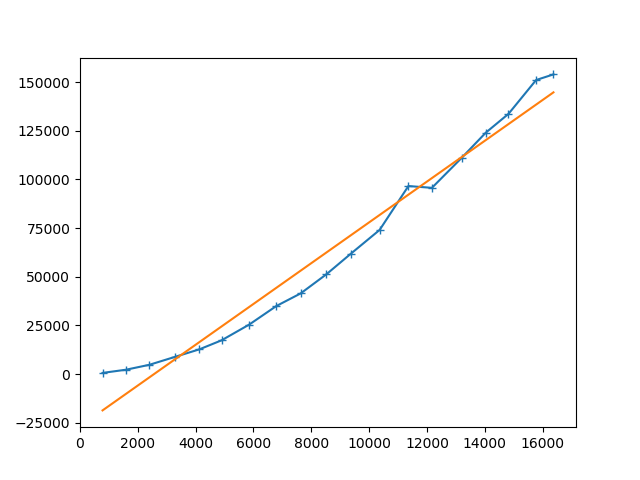

[ 1.04769366e+01 -2.68401009e+04] 0.09544774724795946 -3.725768405967985e-05


In [703]:
reload(hx)

cdsStats = []
flux = []
std = []
var = []

r0 = 10
r1 = len(lastRamp)
for i in range(r0+1,r1-1):
    stats = hx.cdsNoise(lastRamp, r0=r0, r1=i, rad=50, doCorrect=True)
    cdsStats.append(stats)
    flux.append(stats[0])
    std.append(stats[1])
    var.append(std[-1]**2)
    print(f"{i}: {flux[-1]:.2f} {var[-1]:.2f} {flux[-1]/var[-1]:.3f}")
    
flux = np.array(flux)
std = np.array(std)
var = np.array(var)
f, pl = plt.subplots()
pl.plot(flux, var, '-+')

fit = np.polyfit(flux, var, 1)
print(fit, 1/fit[0], 1/fit[1])
pl.plot(flux, np.polyval(fit, flux))
# pl[1].imshow(reg)

[ 7.34059049e-04 -5.19884632e-02 -5.35003407e+00]


<IPython.core.display.Javascript object>


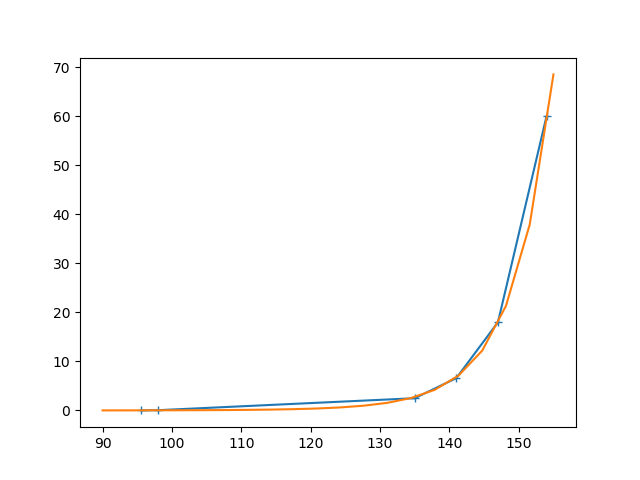

[ 90.          93.42105263  96.84210526 100.26315789 103.68421053
 107.10526316 110.52631579 113.94736842 117.36842105 120.78947368
 124.21052632 127.63157895 131.05263158 134.47368421 137.89473684
 141.31578947 144.73684211 148.15789474 151.57894737 155.        ] [1.68548395e-02 2.23628148e-02 3.01849512e-02 4.14492477e-02
 5.79035236e-02 8.22915982e-02 1.18978411e-01 1.75001995e-01
 2.61866532e-01 3.98638425e-01 6.17362840e-01 9.72666540e-01
 1.55901262e+00 2.54212822e+00 4.21703723e+00 7.11671516e+00
 1.22183876e+01 2.13407842e+01 3.79200601e+01 6.85472164e+01]


In [479]:
t = np.array([95.6, 98,135.0,141,147,154])
f = np.array([0.016, 0.06,2.5,6.6,18,60])
x = np.linspace(90,155,20)
fit = np.polyfit(t, np.log(f), 2)
print(fit)

_,p1 = plt.subplots()
p1.plot(t,f,'-+')
p1.plot(x, np.exp(np.polyval(fit, x)))
print(x, np.exp(np.polyval(fit, x)))

In [633]:
frames = {}
for f_i, f in enumerate((3801, 3812)): # , 2554, 2556)):
    r = hx.rampCds(hx.rampPath(f, cam='n8'), r0=2, r1=9)
    frames[f] = r
    d3.set(f'frame {f_i + 1}')
    d3.set_np2arr(r)

In [153]:
d3.set_np2arr(frames[2556] - frames[2554])

1